In [1]:
import os
import argparse
import datetime
import evodevohpo as hpo

In [2]:
%matplotlib notebook

In [3]:
# Setup genetics
initial_lr  = hpo.Locus(1.0e-3, "--initial_lr",    bounds=[1.0e-5, 1.0e-1], stable=True)
dropout     = hpo.Locus(5.0e-1, "--dropout",       bounds=[1.0e-3, 0.9],    stable=True)
loci = [ initial_lr, dropout ]
chromosome = hpo.Chromosome(loci)

In [4]:
# Create the initial individual
chromosomes = [ chromosome ]
individual = hpo.Individual(chromosomes)

In [5]:
# Move to our example
os.chdir("examples/rpv")
os.environ["DASK_SCHED_FILE"] = "%s/sched.json"%os.environ['SCRATCH']

In [6]:
evaluator = hpo.Evaluator("python3 ./train_rpv.py " +
                          "--initial_lr %f " +
                          "--dropout %f " +
                          "--conv1_filters 8 " +
                          "--conv2_filters 15 " +
                          "--conv3_filters 28 " +
                          "--conv1_kernsz 4 " +
                          "--conv2_kernsz 4 " +
                          "--conv3_kernsz 4 " +
                          "--fullc_size 59 " +
                          "--optimizer 0 " +
                          "--epochs 1 " +
                          "--checkpoint @checkpoint/model.hdf5 ",
                          timeout     = 2400.0,
                          source_path = os.getcwd(),
                          run_path    = "%s/tdir/"%os.environ['SCRATCH'],
                          checkpoint  = "checkpoint")

------------------------------------------------------------
Settings:
------------------------------------------------------------
param_generations:        100
param_gens_per_epoch:     1
param_demes:              1
param_popsize:            100
param_verbose:            True
param_mutation_rate:      0.05
param_crossover_rate:     0.33
param_migration_interval: 5
------------------------------------------------------------
Dask workers: 101
------------------------------------------------------------


<IPython.core.display.Javascript object>


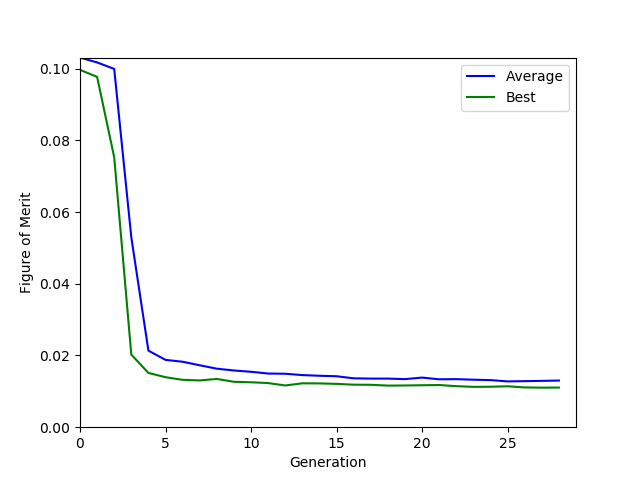

In [7]:
# Setup EvoDevoHPO optimizer
optimizer = hpo.EvoDevoHPO(evaluator      = evaluator,
                           generations    = 100,
                           gens_per_epoch = 1,
                           demes          = 1,
                           popsize        = 100, 
                           mutation_rate  = 0.05,
                           crossover_rate = 0.33,
                           verbose        = True)

In [ ]:
# Optimize!
optimizer.optimize(individual)

------------------------------------------------------------
Best: deme0_ind2966     1.105845e-02 (9.01x) [1.301e-02 avg]
------------------------------------------------------------
--initial_lr:  +1.039391e-03,
--dropout:  +4.983104e-01,
Checkpoint: "deme0_ind2886_checkpoint"
------------------------------------------------------------
deme0     size: 100   fom: 1.301e-02 (avg)
  deme0_ind2966       fom: 1.106e-02 (bst)
    +1.0e-03,+5.0e-01,
------------------------------------------------------------
Run Times:
setup:           3.347e-01 s
checkpoint_in:   1.150e-01 s
run:             7.864e+01 s
checkpoint_out:  7.560e-01 s
cleanup:         4.841e-01 s
------------------------------------------------------------
------------------------------------------------------------
Generation: 29
------------------------------------------------------------
Generation 29: Evaluating 100 unique genotypes (gcache hit rate: 0.0%).
[                        ] | 0% Completed |  1min  8.1s